In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix,accuracy_score,classification_report
from math import sqrt
from sklearn.cluster import KMeans,k_means
%matplotlib inline
np.set_printoptions(formatter={'float_kind=':'{:f}'.format})
sns.set(rc={'figure.figsize':(8,6)})

In [17]:
raw_data=pd.read_csv(r'C:\Users\haast\OneDrive\Documents\Python\data\\Events Raw Data.csv')
print(raw_data.shape)

(14783, 19)


In [18]:
raw_data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


# Exploratory data analysis and data cleaning

In [19]:
raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [20]:
raw_data[raw_data['Would you recommend our events to other people?'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
raw_data=raw_data.dropna(subset=['Did you find our events value for money?'])

In [22]:
raw_data.shape

(14778, 19)

In [23]:
raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

In [24]:
for column in raw_data:
    unique_value=np.unique(raw_data[column])
    len_unique=len(unique_value)
    if (len_unique<10):
        print("The number of values for feature{} is {} with values {}".format(column,len_unique,unique_value))
    else:
        print("The number of values for feature {} is {}".format(column,len_unique))

The number of values for feature CUSTOMER is 14778
The number of values for featureAge is 9 with values ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for featureGender is 2 with values ['Female' 'Male']
The number of values for feature Postcode is 14674
The number of values for feature District is 225
The number of values for feature Constituency is 358
The number of values for feature latitude is 13242
The number of values for feature longitude is 13262
The number of values for featureCurrent_Status is 8 with values ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for featureTotal_Household_Income is 8 with values ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for featureHo

In [25]:
raw_data.columns


Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

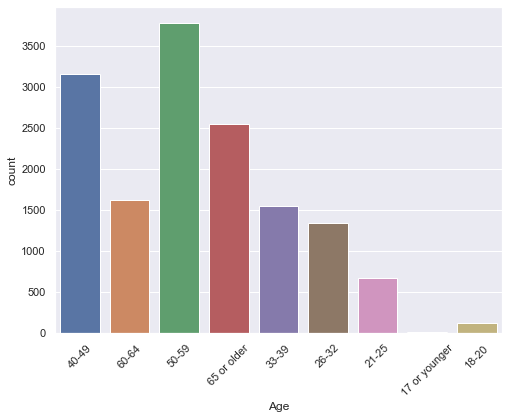

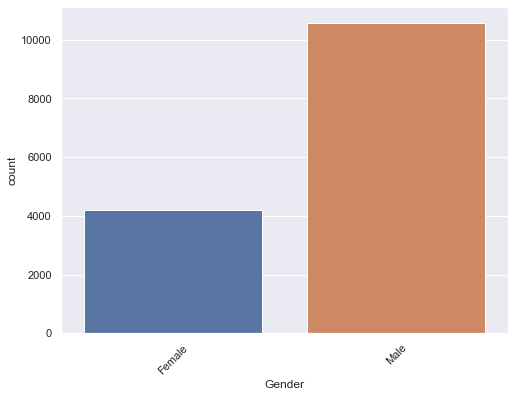

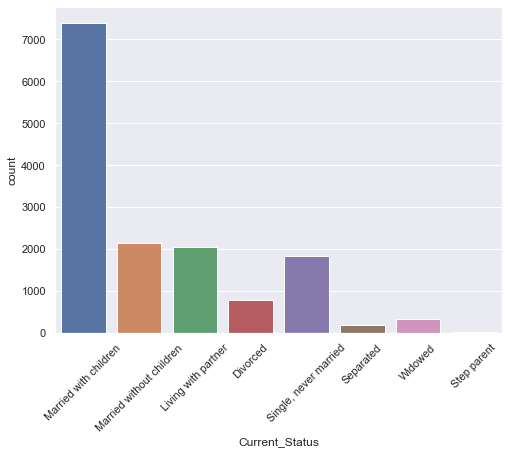

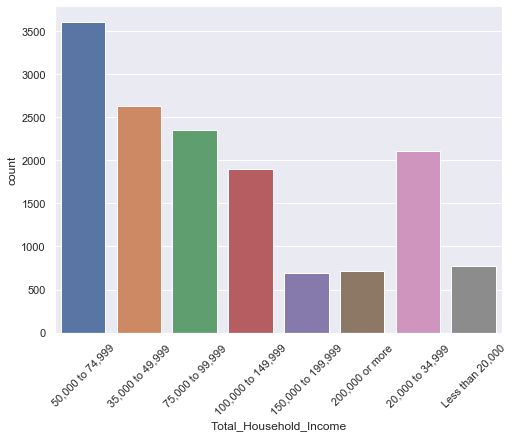

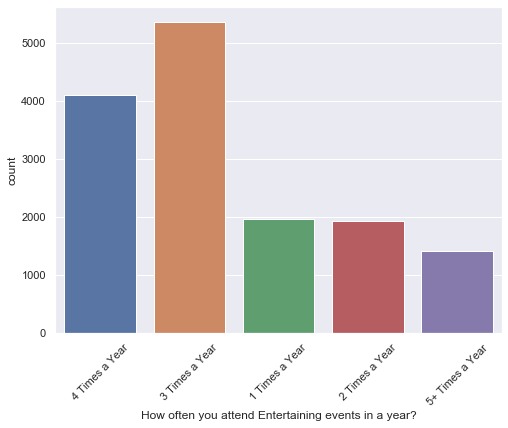

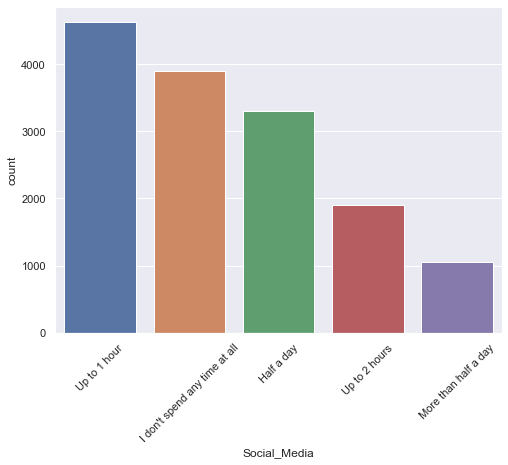

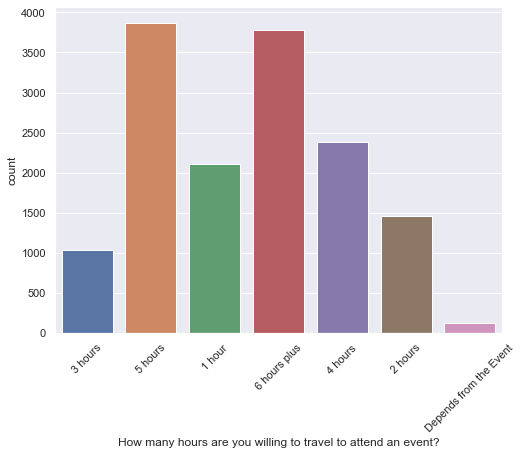

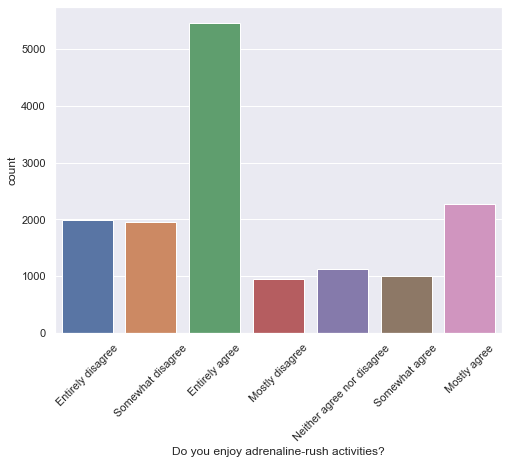

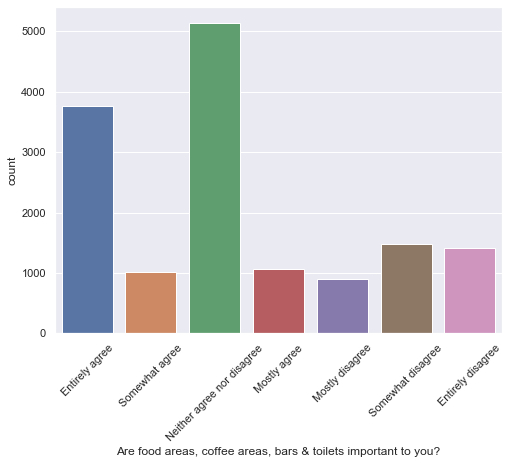

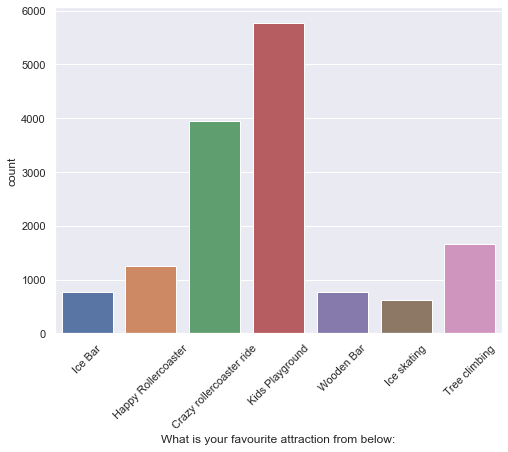

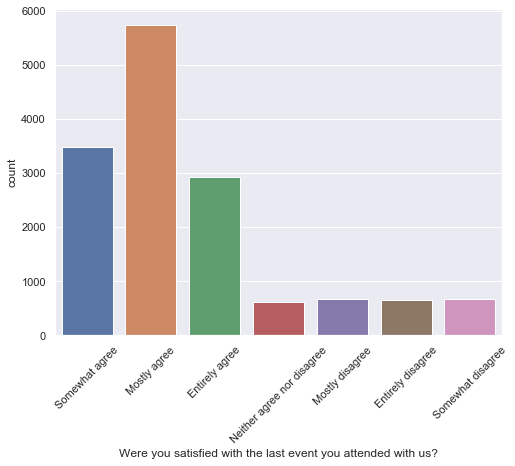

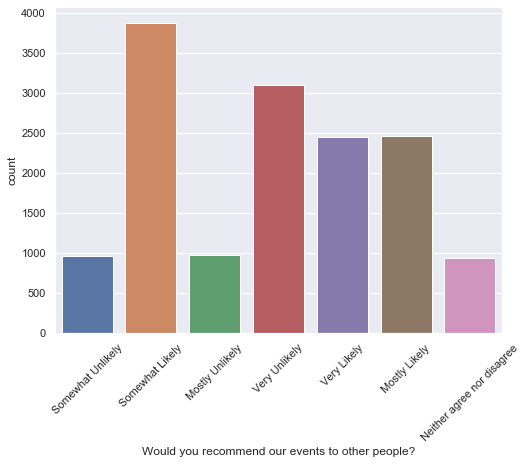

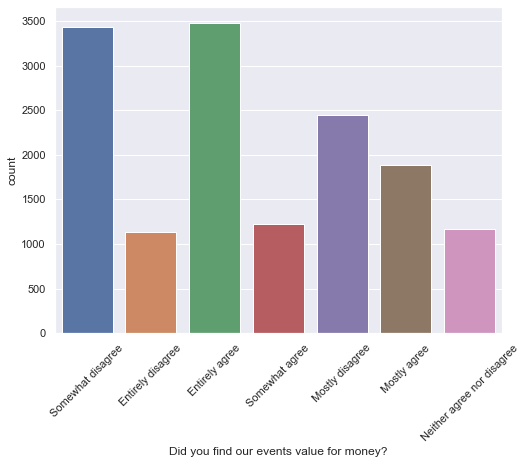

In [26]:
features=['Age', 'Gender',
        'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x=f,data=raw_data)
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering

In [30]:
#Change all categorical data into numerical
print(raw_data.shape)
raw_data=raw_data[features]

new_raw_data=pd.get_dummies(data=raw_data,columns=features)
print(new_raw_data)
#new_raw_data[new_raw_data.head()]

(14778, 13)
       Age_17 or younger  Age_18-20  Age_21-25  Age_26-32  Age_33-39  \
0                      0          0          0          0          0   
1                      0          0          0          0          0   
2                      0          0          0          0          0   
3                      0          0          0          0          0   
4                      0          0          0          0          0   
...                  ...        ...        ...        ...        ...   
14778                  0          0          0          0          0   
14779                  0          0          1          0          0   
14780                  0          0          0          0          0   
14781                  0          0          0          0          0   
14782                  0          0          0          0          0   

       Age_40-49  Age_50-59  Age_60-64  Age_65 or older  Gender_Female  ...  \
0              1          0          0      

In [34]:
new_raw_data.head()

,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [48]:
Xtrain=new_raw_data.values

kmeans=KMeans(n_clusters=7,random_state=2)
kmeans=kmeans.fit(Xtrain)

#Clusters for each observation
print("The clusters are:",kmeans.labels_)

#Inertia for each observation
print("The inertia for each obervations are:",kmeans.inertia_) #Inertia should be as low as possible

The clusters are: [3 2 2 ... 3 4 2]
The inertia for each obervations are: 93814.47396613644


In [57]:
cluster=range(2,20)
inertia=[]

for f in cluster:
    kmeans=KMeans(n_clusters=f,random_state=2)
    kmeans=kmeans.fit(Xtrain)
    u=kmeans.inertia_
    inertia.append(u)
    print("The inertia of cluster",f,"is",u)

The inertia of cluster 2 is 125619.02972065723
The inertia of cluster 3 is 114905.3724936268
The inertia of cluster 4 is 106337.17594801616
The inertia of cluster 5 is 101900.26914146046
The inertia of cluster 6 is 96432.61527743531
The inertia of cluster 7 is 93814.47396613644
The inertia of cluster 8 is 91590.3402239761
The inertia of cluster 9 is 90006.05991540365
The inertia of cluster 10 is 88489.93594577796
The inertia of cluster 11 is 87564.58236352785
The inertia of cluster 12 is 86675.13699623346
The inertia of cluster 13 is 85823.52807353386
The inertia of cluster 14 is 84864.04266668748
The inertia of cluster 15 is 84324.33244181449
The inertia of cluster 16 is 83704.59135440177
The inertia of cluster 17 is 82932.33484166281
The inertia of cluster 18 is 82415.23068530185
The inertia of cluster 19 is 81795.499318891


# Visualizing the best cluster to use

Text(0.5, 1.0, 'Inertia plot perk')

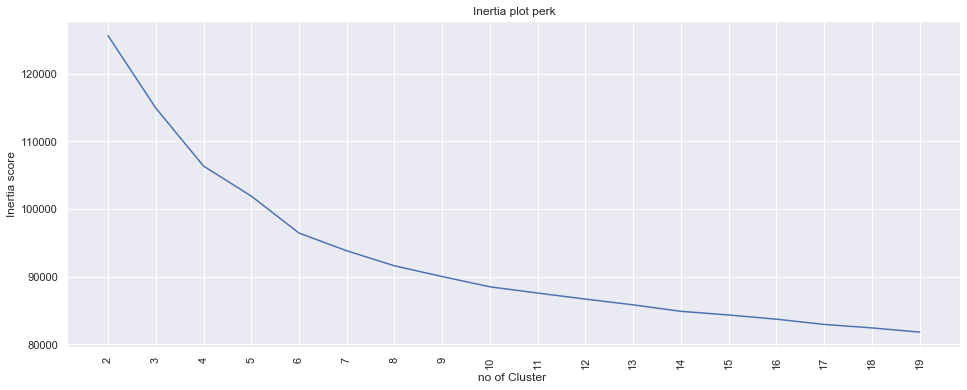

In [58]:
fig,ax1=plt.subplots(1,figsize=(16,6))
xx=np.arange(len(cluster))
plt.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(cluster,rotation='vertical')
plt.xlabel("no of Cluster ")
plt.ylabel("Inertia score")
plt.title("Inertia plot perk")

In [56]:
cluster

range(2, 20)

In [63]:
#Visualizing model with new cluster of 5
kmeans=KMeans(n_clusters=5,random_state=2)
kmeans=kmeans.fit(Xtrain)

#Prediction for new data
prediction=kmeans.predict(Xtrain)

#calculating the count of the cluster
unique,count=np.unique(prediction,return_counts=True)
count=count.reshape(1,5)
#creating a dataframe
df=pd.DataFrame(count,columns=['cluster 0','cluster 1','cluster 2','cluster 3','cluster 4'])
print(df)


   cluster 0  cluster 1  cluster 2  cluster 3  cluster 4
0       2836       2178       1224       4460       4080


In [65]:
kmeans.labels_

array([3, 4, 4, ..., 3, 1, 4])

In [66]:
prediction

array([3, 4, 4, ..., 3, 1, 4])